In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
x = np.load("data/x_normalized.npy")
y = np.load("data/y.npy")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_true_test = np.load("data/x_test_normalized.npy")

def get_metrics(model, axis, preprocessed_test=None):
    prob_preds = model.predict_proba(x_train)
    performance = roc_auc_score(y_train, prob_preds[:, axis])
    print "TRAINING: " + str(performance)
    
    prob_preds = model.predict_proba(x_test)
    performance = roc_auc_score(y_test, prob_preds[:, axis])
    print "TEST: " + str(performance)

In [3]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pickle

model = GaussianNB()
model.fit(x, y)

get_metrics(model, 1)

TRAINING: 0.672479735212818
TEST: 0.660101037705062


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=12, min_samples_leaf=25, random_state=0, verbose=True)
model.fit(x_train, y_train)
    
prob_preds = model.predict_proba(x_train)
performance = roc_auc_score(y_train, prob_preds[:, 1])
print "TRAINING: " + str(performance)

prob_preds = model.predict_proba(x_test)
performance = roc_auc_score(y_test, prob_preds[:, 1])
print "TEST: " + str(performance)

TRAINING: 0.8010055504387918
TEST: 0.7676960592632537


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [73]:
print x_true_test.shape
generate_csv(model, x_true_test, "ERICH")

(16000, 381)
   id    target
0   0  0.585909
1   1  0.102709
2   2  0.201122
3   3  0.396091
4   4  0.288936


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


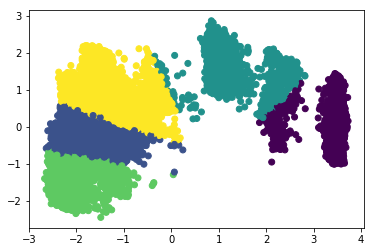

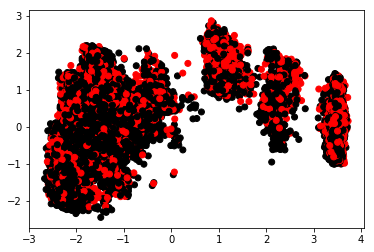

In [32]:
# passive agressive
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)

pca_model.fit(x)
new_x = pca_model.transform(x)

kmeans = KMeans(n_clusters=5, random_state=42).fit(new_x)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'k',
                   }

plt.scatter(new_x[:, 0], new_x[:,1], c=kmeans.labels_.astype(float))
plt.show()


labels = []
for i, _ in enumerate(new_x):
    if y[i] == 1:
        labels.append('r')
    else:
        labels.append('k')
plt.scatter(new_x[:, 0], new_x[:, 1], c = labels)
plt.show()

In [17]:
def generate_csv(model, x_data, name):
    ids = [i for i, _ in enumerate(x_data)]
    ids = np.array(ids)
    
    predictions = model.predict_proba(x_data)[:, 1]
    
    df = pd.DataFrame()
    df['id'] = ids
    df['target'] = predictions
    df.to_csv(name + ".csv", index=False)

    print df.head()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAINING: 0.6731913069214812
TEST: 0.6746901333191333


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAINING: 0.7444415158192144
TEST: 0.7415326680048486


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAINING: 0.7896458576994881
TEST: 0.7636875446736424


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAINING: 0.8145706410360902
TEST: 0.7669056250484959


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


TRAINING: 0.8262981331064968
TEST: 0.7672402799075866


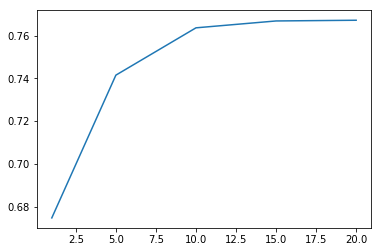

In [76]:

yum = []
yumm = [1, 5, 10, 15, 20]
for max_depth in yumm:
    model = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=25, random_state=0, verbose=True)
    model.fit(x_train, y_train)

    prob_preds = model.predict_proba(x_train)
    performance = roc_auc_score(y_train, prob_preds[:, 1])
    print "TRAINING: " + str(performance)

    prob_preds = model.predict_proba(x_test)
    performance = roc_auc_score(y_test, prob_preds[:, 1])
    print "TEST: " + str(performance)
    
    yum.append(performance)
    
plt.plot(yumm, yum)
plt.show()

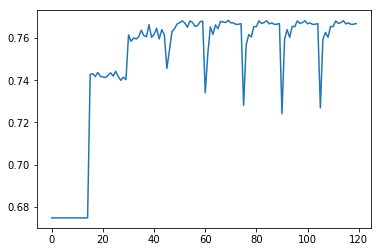

---------
25
0


In [82]:
max_depths = [1, 5, 10, 20, 25, 30, 35, 40]
leafs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
out = []
highest = 0
highest_depth = 0
highest_leaf = 0
for depth in max_depths:
    for leaf in leafs:
        model = RandomForestClassifier(max_depth=depth, min_samples_leaf=leaf, random_state=0)
        model.fit(x_train, y_train)

        prob_preds = model.predict_proba(x_train)
        performance = roc_auc_score(y_train, prob_preds[:, 1])
#         print "TRAINING: " + str(performance)

        prob_preds = model.predict_proba(x_test)
        performance = roc_auc_score(y_test, prob_preds[:, 1])
#         print "TEST: " + str(performance)
        
        if performance > highest:
            
            highest = performance
            highest_depth = depth
            highest_lead = leaf

        out.append(performance)
        

plt.plot([x for x in range(len(max_depths)*len(leafs))], out)
plt.show()


print "---------"
print highest_depth
print highest_leaf

In [71]:
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=10, missing=None, n_estimators=300,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_delta_step=0,
       max_depth=10, min_child_weight=10, missing=None, n_estimators=200,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [72]:
get_metrics(model, 1)

TRAINING: 0.9104873405681265
TEST: 0.7978625901336096


In [69]:
# max depth 10 test: 0.791168
# max depth 8, learning rate 0.05: 0.7919
# max depth 10, learning rate 0.05: 0.79255
# max depth 10, learning rate: 0.01 0.773864

# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_delta_step=0,
#        max_depth=10, min_child_weight=10, missing=None, n_estimators=100,
#        n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=0.8)
# 0.7948941649711267


# model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=0.6, gamma=1, learning_rate=0.05, max_delta_step=0,
#        max_depth=10, min_child_weight=10, missing=None, n_estimators=200,
#        n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=0.8)
# TEST: 0.7978625901336096


# hyperparameter search

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


x = np.load("data/x_normalized.npy")
y = np.load("data/y.npy")

x_true_test = np.load("data/x_test_normalized.npy")

param_comb = 7

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7, 10],
        'n_estimators': [100, 200, 300],
        'learning_rate':[0.01, 0.05, 0.08]
        }


xgb = XGBClassifier(objective='binary:logistic',silent=True, nthread=1)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=1, cv=3, verbose=3, random_state=0)


random_search.fit(x, y)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2 
[CV]  colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2, score=0.785748661835, total= 3.1min
[CV] colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV]  colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2, score=0.791348902576, total= 3.0min
[CV] colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.2min remaining:    0.0s


[CV]  colsample_bytree=0.8, learning_rate=0.05, min_child_weight=1, n_estimators=200, subsample=1.0, max_depth=5, gamma=2, score=0.787548481839, total= 3.2min
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2, score=0.767839596889, total= 2.8min
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2, score=0.77066793963, total= 2.8min
[CV] colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2 
[CV]  colsample_bytree=0.8, learning_rate=0.01, min_child_weight=5, n_estimators=300, subsample=0.6, max_depth=3, gamma=2, score=0.768783954547, total= 2.8min

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 95.2min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=7, n_jobs=1,
          param_distributions={'colsample_bytree': [0.6, 0.8, 1.0], 'learning_rate': [0.01, 0.05, 0.08], 'min_child_weight': [1, 5, 10], 'n_estimators': [100, 200, 300], 'subsample': [0.6, 0.8, 1.0], 'max_depth': [3, 5, 7, 10], 'gamma': [0.5, 1, 1.5, 2, 5]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [70]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'rank_test_score': array([3, 6, 5, 7, 2, 4, 1], dtype=int32), 'param_gamma': masked_array(data=[2, 2, 0.5, 0.5, 5, 2, 2],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'split0_train_score': array([0.83175517, 0.77444293, 0.7991221 , 0.77449934, 0.90169066,
       0.83601034, 0.83755716]), 'split2_test_score': array([0.78754848, 0.76878395, 0.77891653, 0.76898755, 0.78761245,
       0.78359195, 0.78858001]), 'mean_fit_time': array([186.19180409, 167.66494139, 237.99168428, 190.23758737,
       554.59712466, 248.01797899, 309.68813968]), 'std_test_score': array([0.00233443, 0.00117572, 0.00169016, 0.00098822, 0.00272459,
       0.00180034, 0.00214845]), 'params': [{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0, 'max_depth': 5, 'gamma': 2}, {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'min_child_weight': 5, 'n_estimators': 300, 'subsam

NameError: name 'folds' is not defined

In [ ]:
import lightgbm as lgb

train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'num_leaves': 31, 'reg_alpha': 5, 'colsample_bytree': 0.40156941140314745, 'min_child_samples': 211, 'min_child_weight': 0.1, 'n_estimators': 5000, 'subsample': 0.5366130879473803, 'reg_lambda': 0, 'max_depth': 10} 
model= lgb.train(params, train_data, 100) 

In [ ]:
y_pred=model.predict(x_train)

performance = roc_auc_score(y_train, y_pred)
print "TRAINING: " + str(performance)

y_pred=model.predict(x_test)
performance = roc_auc_score(y_test, y_pred)
print "TEST: " + str(performance)

In [95]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

x = np.load("data/x_normalized.npy")
y = np.load("data/y.npy")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_true_test = np.load("data/x_test_normalized.npy")

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(x_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'max_depth':[1, 3, 5, 8, 10, 15, 20],
             'n_estimators':[100, 500, 1000, 5000]
            }

clf = lgb.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=100,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

gs.fit(x_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.777256
Early stopping, best iteration is:
[152]	valid's auc: 0.779715
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.777174
[200]	valid's auc: 0.779789
Early stopping, best iteration is:
[199]	valid's auc: 0.779789
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.777466
Early stopping, best iteration is:
[150]	valid's auc: 0.780008
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.781085
[200]	

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.761398
[200]	valid's auc: 0.765161
[300]	valid's auc: 0.7671
[400]	valid's auc: 0.768356
[500]	valid's auc: 0.769049
Early stopping, best iteration is:
[520]	valid's auc: 0.769101
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.761642
[200]	valid's auc: 0.765546
[300]	valid's auc: 0.767269
[400]	valid's auc: 0.768158
[500]	valid's auc: 0.768654
Early stopping, best iteration is:
[537]	valid's auc: 0.768689
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791255
[200]	valid's auc: 0.792728
Early stopping, best iteration is:
[238]	valid's auc: 0.792994
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.790643
[200]	valid's auc: 0.79296
Early stopping, best iteration is:
[229]	valid's auc: 0.793268
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.788314
[200]	valid's auc: 0.

[400]	valid's auc: 0.774806
[500]	valid's auc: 0.775913
[600]	valid's auc: 0.776603
[700]	valid's auc: 0.777125
[800]	valid's auc: 0.777488
[900]	valid's auc: 0.777807
[1000]	valid's auc: 0.778039
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.778039
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.760845
[200]	valid's auc: 0.769693
[300]	valid's auc: 0.773102
[400]	valid's auc: 0.774805
[500]	valid's auc: 0.775704
[600]	valid's auc: 0.776373
[700]	valid's auc: 0.776837
[800]	valid's auc: 0.777198
[900]	valid's auc: 0.777514
[1000]	valid's auc: 0.777754
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.777754
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791917
[200]	valid's auc: 0.793089
Early stopping, best iteration is:
[218]	valid's auc: 0.793092
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.792306
Early stopping, best iteration is:


Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[1]	valid's auc: 0.5
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.792208
Did not meet early stopping. Best iteration is:
[98]	valid's auc: 0.792303
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.793558
Did not meet early stopping. Best iteration is:
[99]	valid's auc: 0.79364
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.7913
Did not meet early stopping. Best iteration is:
[78]	valid's auc: 0.791668
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.788657
[200]	valid's auc: 0.791443
[300]	valid's auc: 0.792211
Early stopping, best iteration is:
[364]	valid's auc: 0.79293
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.788682
[200]	valid's auc: 0.792893
[300]	valid's auc: 0.794458
[400]	valid's auc: 0.795145
Early st

[100]	valid's auc: 0.792614
Early stopping, best iteration is:
[159]	valid's auc: 0.793253
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.79228
Early stopping, best iteration is:
[141]	valid's auc: 0.793449
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791044
Early stopping, best iteration is:
[145]	valid's auc: 0.792065
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791813
Early stopping, best iteration is:
[163]	valid's auc: 0.793121
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.79201
[200]	valid's auc: 0.794746
Early stopping, best iteration is:
[189]	valid's auc: 0.794949
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.789146
[200]	valid's auc: 0.790261
Early stopping, best iteration is:
[216]	valid's auc: 0.790605
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.792238


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.76338
[200]	valid's auc: 0.76822
[300]	valid's auc: 0.770132
[400]	valid's auc: 0.770855
[500]	valid's auc: 0.771406
[600]	valid's auc: 0.771817
[700]	valid's auc: 0.772157
Early stopping, best iteration is:
[765]	valid's auc: 0.772552
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791395
Early stopping, best iteration is:
[164]	valid's auc: 0.792308
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.792069
[200]	valid's auc: 0.7937
Early stopping, best iteration is:
[181]	valid's auc: 0.793787
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791372
[200]	valid's auc: 0.792834
Early stopping, best iteration is:
[184]	valid's auc: 0.792977
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.790938
Early stopping, best iteration is:
[143]	valid's auc: 0.792008
Training until 

[100]	valid's auc: 0.791618
Early stopping, best iteration is:
[103]	valid's auc: 0.791918
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.783354
Early stopping, best iteration is:
[140]	valid's auc: 0.784354
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.782768
Early stopping, best iteration is:
[143]	valid's auc: 0.783716
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.782329
Early stopping, best iteration is:
[136]	valid's auc: 0.782992
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.792332
Early stopping, best iteration is:
[142]	valid's auc: 0.793316
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791903
[200]	valid's auc: 0.793386
Early stopping, best iteration is:
[171]	valid's auc: 0.793509
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.79006
Early stopping, best iterat

[100]	valid's auc: 0.793705
Early stopping, best iteration is:
[133]	valid's auc: 0.793959
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791492
Early stopping, best iteration is:
[99]	valid's auc: 0.791497
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.790676
Early stopping, best iteration is:
[142]	valid's auc: 0.79173
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.791623
[200]	valid's auc: 0.793222
Early stopping, best iteration is:
[202]	valid's auc: 0.793286
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.788937
Early stopping, best iteration is:
[129]	valid's auc: 0.789645
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.789049
[200]	valid's auc: 0.792404
[300]	valid's auc: 0.793099
Early stopping, best iteration is:
[351]	valid's auc: 0.793558
Training until validation scores don't improve for 30 rounds.


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 19.1min finished


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.793988
[200]	valid's auc: 0.795802
[300]	valid's auc: 0.796995
Early stopping, best iteration is:
[293]	valid's auc: 0.797035
Best score reached: 0.791316896262 with params: {'num_leaves': 31, 'reg_alpha': 5, 'colsample_bytree': 0.40156941140314745, 'min_child_samples': 211, 'min_child_weight': 0.1, 'n_estimators': 1000, 'subsample': 0.5366130879473803, 'reg_lambda': 0, 'max_depth': 20} 


In [68]:
generate_csv(model, x_true_test, "xgboost_new_out")

   id    target
0   0  0.180484
1   1  0.097238
2   2  0.112788
3   3  0.542548
4   4  0.206923
